In [ ]:
import PyPDF2
import re
import os
from os.path import basename
from PyPDF2 import PdfReader
import spacy
import subprocess
import os

In [ ]:
def create_folder(folder_name):
    try:
        os.mkdir(folder_name)
        print(f"Folder '{folder_name}' created successfully.")
    except FileExistsError:
        print(f"Folder '{folder_name}' already exists.")

TACHE 1 : EXTRACTION PDF TO TEXT

In [ ]:
# Répertoires

data_folder = '/mnt/Data/Project_Defi_Personnages/Corpus_ASIMOV'  #pdf originaux
txt_data_folder = data_folder + '/txt_data' #utf8 text
clean_data_folder = data_folder + '/clean_data' #texte nettoyé
POS_data_folder = data_folder + '/POS_data'


freeling_path = '/mnt/Data/Freeling'


In [ ]:
#Crear directorios
create_folder(txt_data_folder)
create_folder(clean_data_folder)
create_folder(POS_data_folder)

Folder '/mnt/Data/Project_Defi_Personnages/Corpus_ASIMOV/txt_data' already exists.
Folder '/mnt/Data/Project_Defi_Personnages/Corpus_ASIMOV/clean_data' already exists.
Folder '/mnt/Data/Project_Defi_Personnages/Corpus_ASIMOV/POS_data' already exists.


In [ ]:
# Lecture des lignes du pdf, extraire le texte, écriture en fichier.txt

def extraire_texte(pdf_path):
    with open(pdf_path, 'rb') as archivo_pdf:
        pdf_reader = PdfReader(archivo_pdf)
        texto = ''
        for pagina in pdf_reader.pages:
            texto_pagina = pagina.extract_text()
            texto += texto_pagina
    return texto

def folder_process_extraction(folder_path):
    files_names = []
    for file in os.listdir(folder_path):
        if file.endswith(".pdf"):
            file_path = os.path.join(folder_path, file)
            texto_extraido = extraire_texte(file_path)

            # Crear un archivo de texto con el mismo nombre pero con extensión .txt
            nombre_txt = os.path.splitext(file)[0] + ".txt"
            ruta_txt = os.path.join(txt_data_folder, nombre_txt)

            files_names.append(ruta_txt)

            with open(ruta_txt, 'w', encoding='utf-8') as archivo_txt:
                archivo_txt.write(texto_extraido)

            print(f'Se ha procesado el archivo {file} y se ha guardado como {nombre_txt}')
    return files_names

# Procesa todos los archivos PDF en el directorio 'Corpus_ASIMOV/'
files_names = folder_process_extraction(data_folder)


Se ha procesado el archivo Fondation_sample.pdf y se ha guardado como Fondation_sample.txt
Se ha procesado el archivo Fondation_et_empire_sample.pdf y se ha guardado como Fondation_et_empire_sample.txt
Se ha procesado el archivo Fondation_foudroyée_sample.pdf y se ha guardado como Fondation_foudroyée_sample.txt
Se ha procesado el archivo Terre_et_Fondation_sample.pdf y se ha guardado como Terre_et_Fondation_sample.txt
Se ha procesado el archivo Seconde_Fondation_sample.pdf y se ha guardado como Seconde_Fondation_sample.txt


In [ ]:
# Nettoyage du corpus texte résultant à l’aide des regex (numéro des pages, symboles, lignes vides, dates, nom de l'auteur)

def nettoyer_texte(fichier_entree, fichier_sortie):

    with open(fichier_entree, 'r', encoding='utf-8') as file_in:
        texte = file_in.read()

        # Usage d'expressions regulières et manipulation de chaînes de charactères pour nettoyer le texte
        texte_nettoye = re.sub(r'� \d+ �|- \d+ -|�[a-zA-Z]+|\d+|�[^\s]*|- |"|- |_|\.\.\.|\?|:|\(|\)| ,', '', texte)
        texte_nettoye = re.sub(r'Asimov, Isaac|Isaac Asimov', '', texte_nettoye)

        # Éliminer les espaces extra (répétés par la suite)
        texte_nettoye = re.sub(r'\s+', ' ', texte_nettoye).strip()

    #    Filtrer les lignes vides
        lignes_non_vides = [ligne for ligne in texte_nettoye.split('\n') if ligne.strip()]

    with open(fichier_sortie, 'w', encoding='utf-8') as file_out:
        file_out.write('\n'.join(lignes_non_vides))

for file in os.listdir(txt_data_folder):

      fichier_entree = os.path.join(txt_data_folder, file)


      # Crear un archivo de texto con el mismo nombre pero con extensión .txt
      nombre_txt = os.path.splitext(file)[0] + ".txt"
      fichier_sortie = os.path.join(clean_data_folder, nombre_txt)

      texto_clean = nettoyer_texte(fichier_entree, fichier_sortie)

      print(f'Fichier {file} nettoyé et sauvegadé comme {fichier_sortie}')

Se ha limpiado el archivo Seconde_Fondation_sample.txt y se ha guardado como /mnt/Data/Project_Defi_Personnages/Corpus_ASIMOV/clean_data/Seconde_Fondation_sample.txt
Se ha limpiado el archivo Fondation_et_empire_sample.txt y se ha guardado como /mnt/Data/Project_Defi_Personnages/Corpus_ASIMOV/clean_data/Fondation_et_empire_sample.txt


Se ha limpiado el archivo Fondation_sample.txt y se ha guardado como /mnt/Data/Project_Defi_Personnages/Corpus_ASIMOV/clean_data/Fondation_sample.txt
Se ha limpiado el archivo Terre_et_Fondation_sample.txt y se ha guardado como /mnt/Data/Project_Defi_Personnages/Corpus_ASIMOV/clean_data/Terre_et_Fondation_sample.txt
Se ha limpiado el archivo Fondation_foudroyée_sample.txt y se ha guardado como /mnt/Data/Project_Defi_Personnages/Corpus_ASIMOV/clean_data/Fondation_foudroyée_sample.txt


TACHE 2 : CARACTERISATION DU CORPUS

In [ ]:
# Afficher les statistiques dans un fichier .txt pour chaque fichier du corpus

def generer_statistiques_corpus(fichier_entree):#, fichier_sortie):
    with open(fichier_entree, "r", encoding="utf-8") as fichier:
        contenu = fichier.read()

        # Diviser le contenu en phrases et compter le nombre de phrases
        phrases = re.split(r'[.!?]', contenu)
        nombre_phrases = len(phrases)

        # Diviser chaque phrase en mots et compter le nombre de mots
        mots = [re.findall(r'\w+', phrase) for phrase in phrases]
        nombre_mots = sum(len(phrase) for phrase in mots)

        # Compter le nombre de caractères dans le corpus
        nombre_caracteres = len(contenu)

        nom_fichier  = basename(fichier_entree)

    #with open(fichier_sortie, 'w', encoding='utf-8') as file_out:

    #    file_out.write(f"Nom du fichier d'entrée : {nom_fichier}\n")
    #    file_out.write(f"Nombre de phrases : {nombre_phrases}\n")
    #    file_out.write(f"Nombre de mots : {nombre_mots}\n")
    #    file_out.write(f"Nombre de caractères : {nombre_caracteres}\n")
    return nombre_phrases, nombre_mots, nombre_caracteres


for file in os.listdir(clean_data_folder):

      file_path = os.path.join(clean_data_folder, file)

      nom_fichier = os.path.splitext(file)[0] + ".txt"
      nombre_phrases, nombre_mots, nombre_caracteres = generer_statistiques_corpus(file_path)

      # Crear un archivo de texto con el mismo nombre pero con extensión .txt
      fichier_sortie = "stats_corpus_ASIMOV.txt"

      with open(fichier_sortie, 'a', encoding='utf-8') as file_out:
          file_out.write(f"Nom du fichier d'entrée : {nom_fichier}\n")
          file_out.write(f"Nombre de phrases : {nombre_phrases}\n")
          file_out.write(f"Nombre de mots : {nombre_mots}\n")
          file_out.write(f"Nombre de caractères : {nombre_caracteres}\n\n")

#folder_process_stats('/home/nas-wks01/users/uapv2200449/Bureau/DEFI4_PERSONNAGES/Corpus_ASIMOV/')

LANCER FREELING DEPUIS LE RÉPERTOIRE DU CORPUS ASIMOV OÙ IL Y A TOUS LES FICHIERS .txt NETTOYÉS

$ analyze -f fr.cfg < fichier.txt

on a en sortie 3 colonnes (par phrase)(voir documentation freeling):

    https://freeling-user-manual.readthedocs.io/en/v4.1/analyzer/

    mot__lemme__catégorie grammaticale(ex: nom propres NP)__probabilité

Enregistrer ces informations :

$ analyze -f fr.cfg < fichier.txt > sortie.txt

In [ ]:
#Freeling fonctionne dans un conteneur Docker

def Run_terminal(fichier_entree, fichier_sortie):

    commande =f'docker run -i --rm  freeling analyze -f fr.cfg <{fichier_entree} >{fichier_sortie} '
    # Exécuter la commande
    subprocess.run(commande, shell=True)

In [ ]:
#Exécuter Freeling pour chaque fichier
for file in os.listdir(clean_data_folder):
    file_path = os.path.join(clean_data_folder, file)
    nom_fichier = os.path.splitext(file)[0] + ".txt"
    fichier_sortie = os.path.join(POS_data_folder, nom_fichier)
    Run_terminal(file_path, fichier_sortie)

In [ ]:
# Fonction permettant d'obtenir les premiers mots des lignes contenant une sous-chaîne spécifique
def get_first_words_with_substring(file_path, substring):
    names = []

    with open(file_path, 'r') as file:
        for line in file:
            if substring in line:
                first_word = line.split()[0]
                if(first_word!="Je"):
                    names.append(first_word.replace('_',' ')) #Freeling pone underscore en los espacios

    return names


name_lists = []
file_names = os.listdir(POS_data_folder)

for i in range(len(file_names)):
    #print(files_names[i])
    file_path = os.path.join(POS_data_folder, file_names[i])
    result_list = get_first_words_with_substring(file_path,'NP00000')  #obtenir la liste des noms de chaque chapitre
    name_lists.append(list(set(result_list)))

print(name_lists)


[['Seconde Fondation Pourquoi', 'Lavenirduplanseldon', 'Preem Palver', 'Voulez-vous', 'Hober Mallow', "M'", 'Comète Double', 'Massena', 'Fondation-Kalgan', 'Seconde', 'Puis', 'Hochement', 'Chhhhhuttt', 'Ifni', 'Anciens de Rossem', 'Interrègne ENCYCLOPEDIA GALACTICA Joie Turbor', 'Ces', 'Farine', 'Trantor Non', 'Intrigues', 'Leur', 'Parfaitement', 'Santanni', 'Thallos', 'A-t-on', "L' Avenir", 'Secteur', 'Homir Munn', 'Exactement', 'Quelque part', 'Pis', 'Bien sûr', 'Galaxie', 'Maire', 'Sept', "Munn C'", "Trantor Parce qu'", 'Ils', 'Intéressant', 'Grand Plan de Hari Seldon', 'Seigneur', 'Vous', 'Les Anciens', "L'", "Ecole Centrale d' Anacréon", 'Ça', 'Votre', 'Mais Arcadia', 'Sur Trantor', 'Mes', 'Poli Elle', 'Enfer', 'Kalgan', 'Confiance', 'Tazenda', 'Rares', 'Devers', 'Hélicon', 'Premier Citoyen de la Galaxie', "Premier Citoyen de l' Union", 'Tout', 'Seigneur Stettin de Kalgan', 'Fondations', 'Rossemites', 'T.V.', 'Dame Callia', 'Rigel', 'Si', 'Impasse', 'Parfait', 'Epées', 'Détente', 

In [ ]:
#No se utiliza porque se reduce la lista demasiado

import spacy

nlp = spacy.load("en_core_web_sm")
filter_name_lists =[]

for i in range(len(name_lists)):
    names=[]
    for name in name_lists[i]:
        doc = nlp(name)
        persons = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']
        names.append([word for word in persons if word.istitle()])  #elimina las qeu no empiezan en mayuscula

    x = [item for item in names if item]
    filter_name_lists.append(x)

#print(len(filter_name_lists))

In [ ]:
import Levenshtein

def longest_common_subsequence(s1, s2):
    m, n = len(s1), len(s2)
      # Create a 2D table to store the lengths of LCS
    lcs_table = [[0] * (n + 1) for _ in range(m + 1)]

    # Build the LCS table in a bottom-up manner
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if s1[i - 1] == s2[j - 1]:
                lcs_table[i][j] = lcs_table[i - 1][j - 1] + 1
            else:
                lcs_table[i][j] = max(lcs_table[i - 1][j], lcs_table[i][j - 1])

    # Reconstruct the LCS
    lcs = []
    i, j = m, n
    while i > 0 and j > 0:
        if s1[i - 1] == s2[j - 1]:
            lcs.append(s1[i - 1])
            i -= 1
            j -= 1
        elif lcs_table[i - 1][j] > lcs_table[i][j - 1]:
            i -= 1
        else:
            j -= 1

    # Reverse the LCS to get the correct order
    lcs.reverse()

    return ''.join(lcs)

def count_common_words(name1, name2):
    # Tokenize sentences into words
    words1 = set(name1.split())
    words2 = set(name2.split())

    # Find the common words
    common_words = words1.intersection(words2)

    # Count the number of common words
    num_common_words = len(common_words)

    return num_common_words

import gender_guesser.detector as gender

def Gender_match(name1,name2):
  d = gender.Detector()
  words1 = name1.split()
  words2 = name2.split()

  gender1=[]
  gender2=[]

  for name in words1:
    gender1.append(d.get_gender(name))

  for name in words2:
    gender2.append(d.get_gender(name))

  return (gender1.count('female') == gender2.count('female'))  and (gender2.count('male') == gender2.count('male'))

def compute_similarity(s1,s2):

    levenshtein_distance = Levenshtein.distance(s1, s2)
    hamming_distance = Levenshtein.hamming(s1, s2)
    jaro = Levenshtein.jaro(s1, s2)
    jaro_winkler = Levenshtein.jaro_winkler(s1, s2)

    #Normalizacion
    length = max(len(s1),len(s2))

    len_words = max(len(s1.split()),len(s2.split()))

    L = 1-levenshtein_distance/length
    H = 1-hamming_distance/length

    J = jaro
    JW = jaro_winkler
    LCD = len(longest_common_subsequence(s1, s2))/length

    W = count_common_words(s1,s2)/len_words


    simmilarity = 0.2*L + 0.1*H + 0.1*J + 0.1*JW + 0.2*LCD + 0.3*W
    return simmilarity


def find_similar_groups(names,similarity_threshold):
  groups = []

  for i in range(len(names)):

    current_name = names[i]
    found_group = False

    # Check if the current name can be added to an existing group for the similrity and the gender
    for group in groups:

        if any(compute_similarity(current_name, existing_name) > similarity_threshold for existing_name in group) and any(Gender_match(current_name, existing_name) == True for existing_name in group):
            group.append(current_name)
            found_group = True
            break

    # If not, create a new group with the current name
    if not found_group:
        groups.append([current_name])

  return groups

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
def count_words_between(word1, word2, text):
    words = text.split()
    indices_word1 = [i for i, word in enumerate(words) if word == word1]
    indices_word2 = [i for i, word in enumerate(words) if word == word2]

    matrix = [[0 for _ in range(len(indices_word2))] for _ in range(len(indices_word1))]

    for i, index1 in enumerate(indices_word1):
        for j, index2 in enumerate(indices_word2):
            if abs(index1 - index2) <= 25:
                matrix[i][j] += 1

    return matrix

def create_graph(word_list, text):
    G = nx.Graph()

    for i, word1 in enumerate(word_list):
        for j, word2 in enumerate(word_list):
            if i != j:
                count_matrix = count_words_between(word1, word2, text)
                #print(count_matrix)
                total_count = sum(sum(row) for row in count_matrix)
                G.add_edge(word1, word2, weight=total_count)

    return G


def plot_graph(G):
    #pos = nx.spring_layout(graph)
    pos = nx.kamada_kawai_layout(G)

    # Filter out nodes with all edges having weight 0
    non_empty_nodes = [node for node in G.nodes if any(G[node][neighbor]['weight'] != 0 for neighbor in G.neighbors(node))]


    # Filter out edges with weight 0
    edges_to_draw = [(u, v) for u, v, w in G.edges(data='weight') if w != 0]

    # Draw the graph with Kamada-Kawai layout, only for non-empty nodes
    pos = nx.kamada_kawai_layout(G.subgraph(non_empty_nodes))
    nx.draw(G.subgraph(non_empty_nodes), pos, with_labels=True, font_weight='bold', node_size=200, node_color='skyblue', edgelist=edges_to_draw, edge_color='gray')

    # Add edge labels with small font size for edges with weight > 0
    edge_labels = {(u, v): w for (u, v, w) in G.edges(data='weight') if w > 0}
    nx.draw_networkx_edge_labels(G.subgraph(non_empty_nodes), pos, edge_labels=edge_labels, font_size=6, font_color='blue')

    # Show the plot
    plt.show()


/mnt/Data/Project_Defi_Personnages/venv/lib/python3.11/site-packages/networkx/drawing/layout.py:724: RuntimeWarning: divide by zero encountered in divide
  costargs = (np, 1 / (dist_mtx + np.eye(dist_mtx.shape[0]) * 1e-3), meanwt, dim)
/mnt/Data/Project_Defi_Personnages/venv/lib/python3.11/site-packages/networkx/drawing/layout.py:724: RuntimeWarning: divide by zero encountered in divide
  costargs = (np, 1 / (dist_mtx + np.eye(dist_mtx.shape[0]) * 1e-3), meanwt, dim)


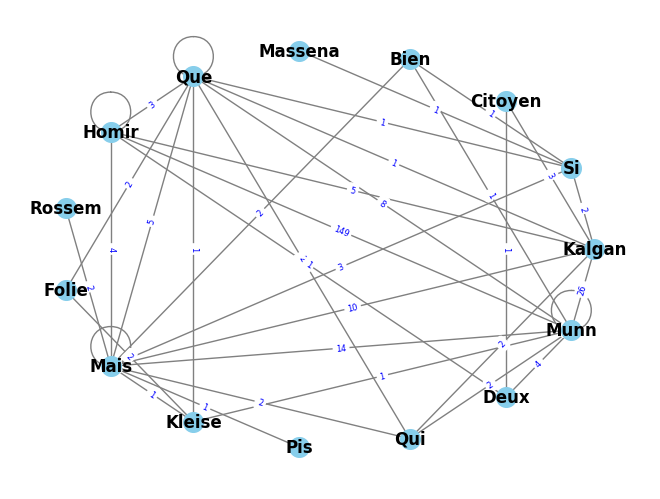

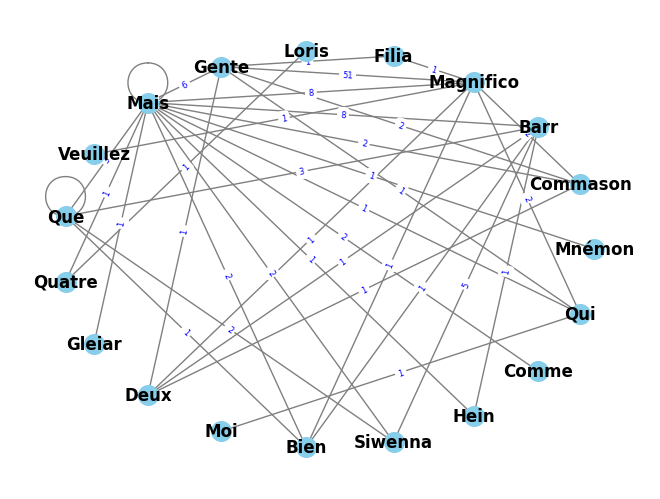

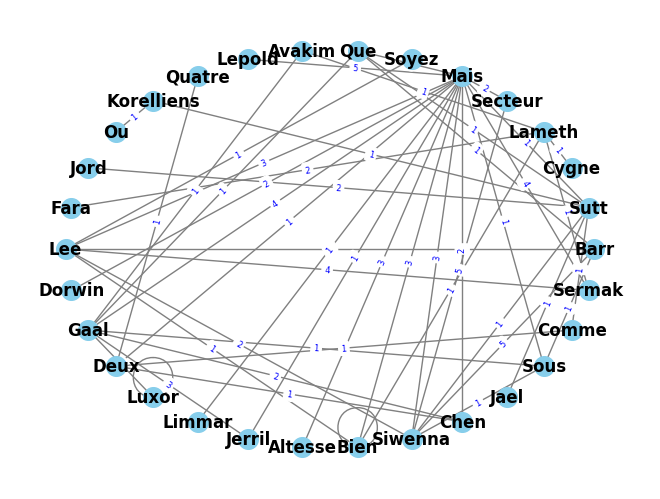

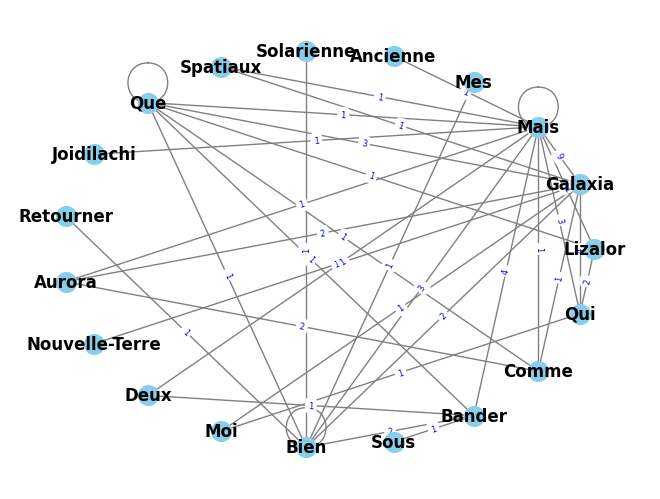

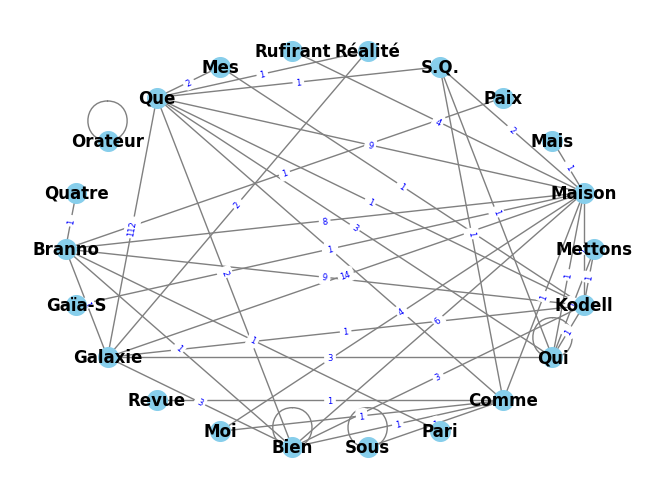

In [ ]:
similarity_threshold = 0.5
file_names_clean = os.listdir(clean_data_folder)


for i in range(len(file_names_clean)):

  # Grouping
  # Flatten the nested list into a single list of strings
  name_list = [item for sublist in filter_name_lists[i] for item in sublist]
  #print(name_list)
  result_groups = find_similar_groups(name_list,similarity_threshold)


  #print("Alias Groups in file ",file_names_clean[i])
 # for group in result_groups:
  #    print(group)

  file_path = os.path.join(clean_data_folder, file_names_clean[i])
  fil = open(file_path, 'r')
  text = fil.readlines()
  text = " ".join(text)


  #Remplacer chaque nom équivalent dans le texte par le premier nom du groupe
  for i in range(len(result_groups)):
    equivalent_names = result_groups[i]
    substitute_name = equivalent_names[0]

    for name in equivalent_names[1:]:
        text = text.replace(name, substitute_name)

  #Calcular la distancia entre nombres y hacer grapho

  #word_list = ["apple", "banana", "orange"] #poner aqui lista de nombre
  #long_text = "apple pear banana apple orange grape banana apple"  #poner aqui texto (hay qeu quitar todo lo qeu no sea palabras)

  word_graph = create_graph(name_list, text)

  plot_graph(word_graph)



